#Objectives for this Analysis:


*   What is the most frequent genre of movies released on Netflix.
*   What genres has highest votes?
*   What movie got highest popularity?what it's genre
*   What movie got low popularity? What it's genre
*   Which year has the most filmed movies?



In [ ]:
import pandas as pd
import pandas as numpy
import matplotlib.pyplot as plt
import seaborn as sns



raw_movies_data = pd.read_csv('mymoviedb.csv', lineterminator= '\n')
df = pd.DataFrame(raw_movies_data)
df.head(3)


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [ ]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

#Exploration Summary


1.   We have data_frame consisting of 9827 rows and 9 colums
2.   Our dataset looks a bit tidy with no NANs nor duplicate values
3.   Release_Data colums needs to be casted into datetime and extract only the year
4.   Overview , Original_language and Post_Url not usefull in the analysis, so we'll drop them.
5.   There is noticable outlier in popularity colums.
6.   Vote_Average better be categorized in proper analysis.
7.   Genre Colums has comma sperated values and white Space that needs to be handled and casted into category .Exploration Summary



In [ ]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtype)

datetime64[ns]


In [ ]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtype

dtype('int32')

*     Here Change/assign the variable name is "new_data" to "df"

In [ ]:
new_data  = df
new_data.head(3)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...


#Dropping Useless

*   Sucha as Overview , Original_language , Posted_Url



In [ ]:
cols = ['Overview','Original_Language','Poster_Url']
new_data.drop(cols , axis=1, inplace=True)

In [ ]:
new_data.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

#Categorizing Vote_Ayerage Colum

*    We would cut the vote average values and make 4 categories :* popular , average , below_avg , not_popular* to describe it more using catigorize_col() function provided above

In [ ]:
def catigorize_col(df , col, labels):

  edges = [df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]

  df[col] = pd.cut(df[col] , edges , labels=labels , duplicates = 'drop')

  return df

In [ ]:
labels = ['not_popular','below_avg','average','popular']
catigorize_col(df ,'Vote_Average' , labels)



,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [ ]:
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [ ]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


In [ ]:
df.dropna(inplace=True)

df.isnull().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


We'd split genre into the a list and than explode the dataframeto be have only one genre per row for each movie

In [ ]:
df['Genre'] = df['Genre'].str.split(', ')


df = df.explode('Genre')
df.head().reset_index(drop = True)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
#Casting Colum into Category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
# Casting Column into Coategory

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25552 entries, 0 to 9826
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 949.1+ KB


In [ ]:
df.nunique()

,0
Release_Date,100
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,19


#Data Visualization

In [ ]:
sns.set_style('darkgrid')

#What is the most frequent genre of movies released on Netflix.

In [ ]:
df['Genre'].describe()

,Genre
count,25552
unique,19
top,Drama
freq,3715


<Figure size 1000x1200 with 0 Axes>

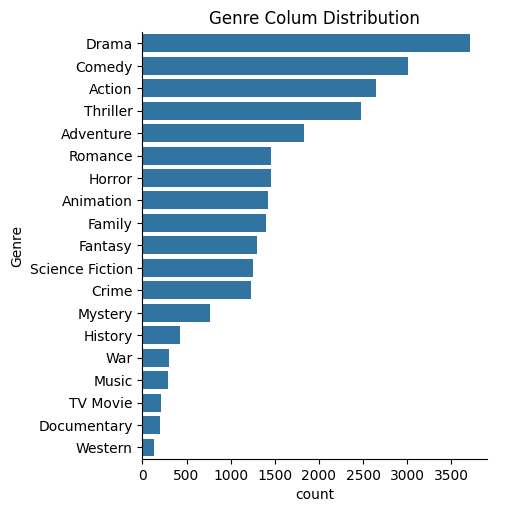

In [ ]:
plt.figure(figsize=(10,12))
sns.catplot(y='Genre' , kind='count' , data=df ,
            order=df['Genre'].value_counts().index)
plt.title('Genre Colum Distribution')

plt.show()

#What genres has highest votes?

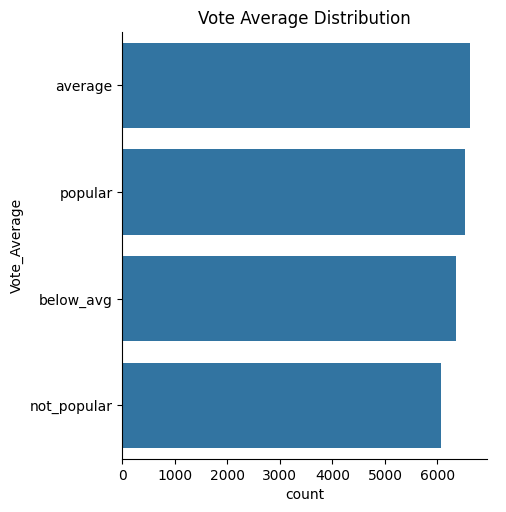

In [ ]:
sns.catplot(y= 'Vote_Average', data= df , kind='count' ,
            order=df['Vote_Average'].value_counts().index) # call value_counts() to get the Series then access index
plt.title('Vote Average Distribution')
plt.show()

#What movie got highest popularity?what it's genre


In [ ]:
# df[df['Popularity']] == df['Popularity'].max()
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


#What movie got low popularity? What it's genre

In [ ]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
9825,2021,The United States vs. Billie Holiday,13.354,152,average,Music
9825,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
9825,2021,The United States vs. Billie Holiday,13.354,152,average,History
9826,1984,Threads,13.354,186,popular,War
9826,1984,Threads,13.354,186,popular,Drama
9826,1984,Threads,13.354,186,popular,Science Fiction


#Which year has the most filmed movies?

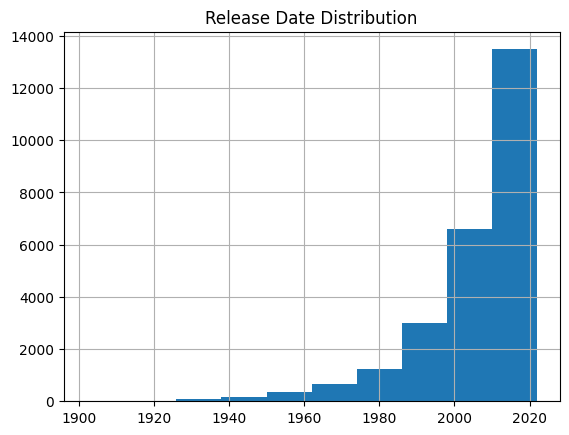

In [ ]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.show()


#Conclusion

Q1 : What is the most frequent genre of movies released on Netflix.

*Drama genre is the most frequent genre in our dataset and has appeared more than 14%of the times among 19 other games.*


Q2 : What genres has highest votes?

*We have 25.5% of our dataset with popular vote(6520 rows).Drama again get highest popularity amnong the fans.*


Q3 : What movie got highest popularity?what it's genre

*Spider-Man: No way home has the highest popularity rate in our dataset and it has generes of Action, Adventure and Science*


Q4: What movie got low popularity? What it's genre

*The "United-State , Threads"has the lowest rate in our dataset and it has genres of Music , Drama , War , sci-fi and history*

Q5: Which year has the most filmed movies?

*Year 2020 has the highest filming rate in our dataset*